# Time Series

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Grouper
from pandas import DataFrame
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [3]:
series = pd.read_csv('daily-minimum-temperatures.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

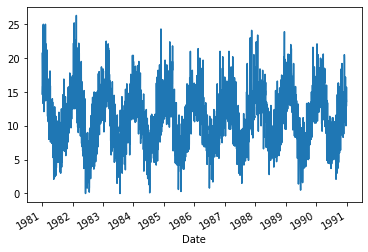

In [5]:
series.plot()
plt.show()

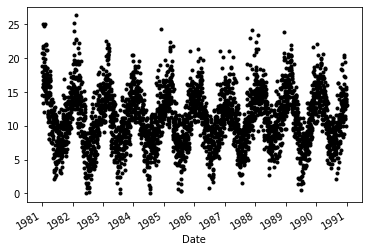

In [6]:
series.plot(style = 'k.')
plt.show()

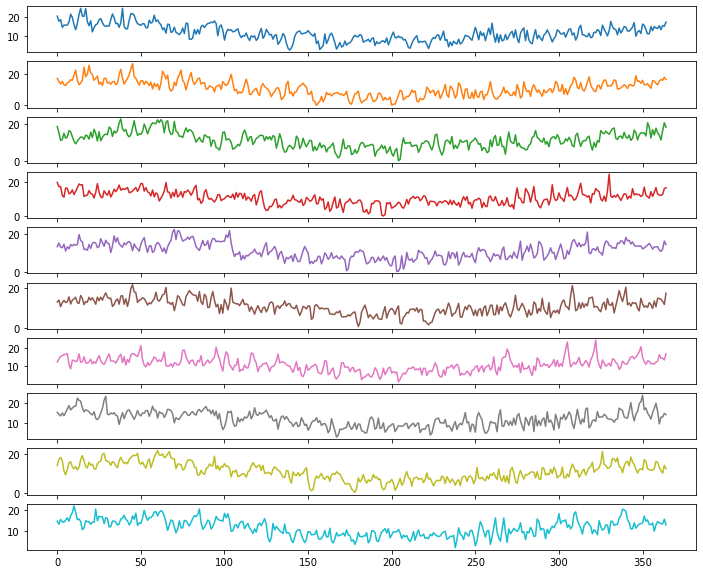

In [13]:
groups = series.groupby(Grouper(freq = 'A'))
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values
years.plot(subplots = True, legend = False, figsize = (12, 10))
plt.show()

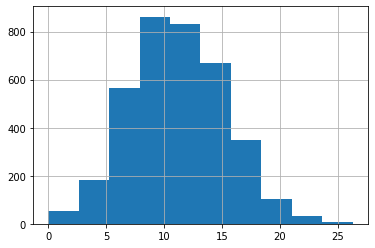

In [14]:
#time series histogram and density plots
series.hist()
plt.show()

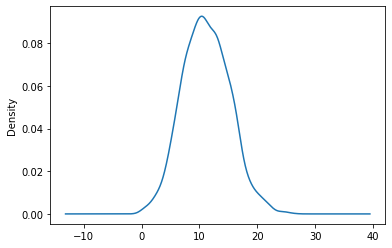

In [15]:
series.plot(kind = 'kde')
plt.show()

/Users/pauladelpinoramirez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v = np.array(v, copy=False)
/Users/pauladelpinoramirez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1672: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  subarr = np.array(values, dtype=dtype, copy=copy)
/Users/pauladelpinoramirez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a 

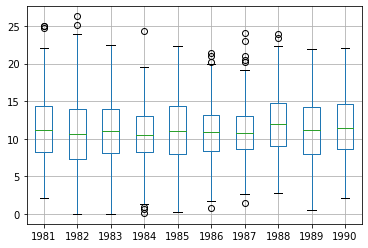

In [16]:
#time series bbox and whisker plots by interval
groups = series.groupby(series.index.year)
groups = pd.Series(groups)

years = pd.DataFrame()
for name, group in groups:
    years[str(name)] = group.values

years.boxplot()
plt.show()

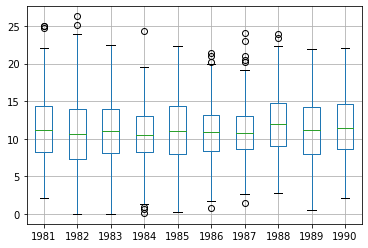

In [17]:
groups = series.groupby(Grouper(freq = 'A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values

years.boxplot()
plt.show()

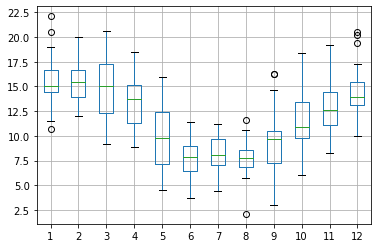

In [22]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq = 'M'))
months = concat([DataFrame(x[1].values) for x in groups], axis = 1)
months = DataFrame(months)
months.columns = range(1, 13)
months.boxplot()
plt.show()

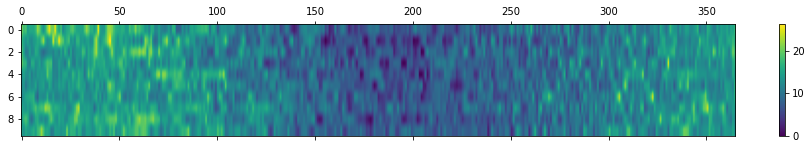

In [23]:
#Time series heat maps
groups = series.groupby(Grouper(freq = 'A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation = None, aspect = 'auto')
plt.colorbar()
plt.show()

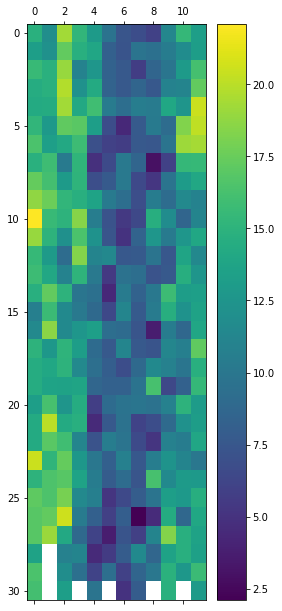

In [25]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq = 'M'))
months = concat([DataFrame(x[1].values) for x in groups], axis = 1)
months = DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation = None, aspect = 'auto')
plt.colorbar()
plt.show()

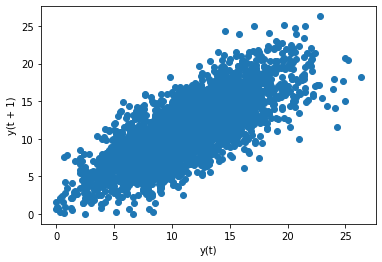

In [28]:
#Time series lag scatter plots
lag_plot(series)
plt.show()

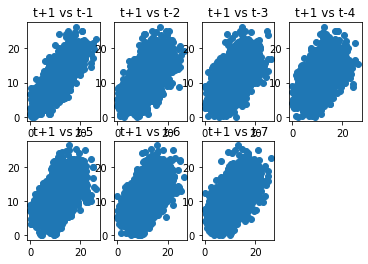

In [30]:
values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis = 1)
columns = ['t+1']

for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)

for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x = dataframe['t+1'].values, y = dataframe['t-'+str(i)].values)
plt.show()

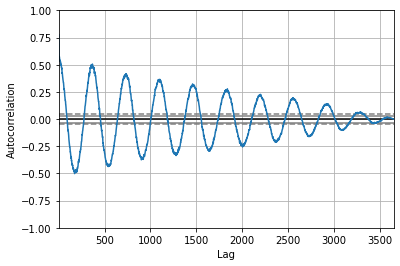

In [33]:
# Time series autocorrelation plots
autocorrelation_plot(series)
plt.show()